In [39]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble
import time

In [5]:
lfw = datasets.fetch_lfw_people(min_faces_per_person = 100, resize = 0.4)

In [6]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [8]:
lfw.data.shape

(1140, 1850)

In [9]:
lfw.images.shape

(1140, 50, 37)

**If we look at the shape, this time we dont have the square images, we have the rectangular images  
each image is 50x37**

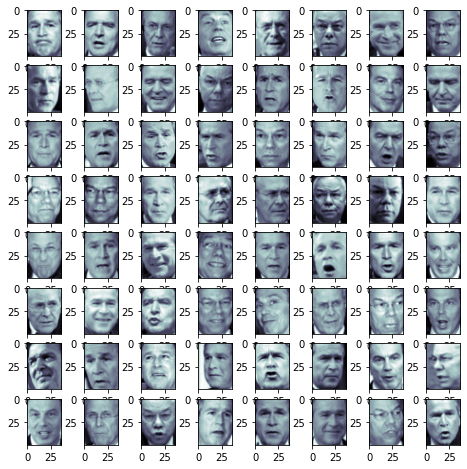

In [10]:
## now we will plot this. 
fig = plt.figure(figsize = (8,8))

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)  # we give three things no of rows, no of columns and position
    ax.imshow(lfw.images[i], cmap = plt.cm.bone)
plt.show()

In [23]:
x, y = lfw.data, lfw.target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
pca_oliv = PCA()
pca_oliv.fit(x)

## here we applied pca to find the no of n_components

PCA()

In [12]:
k = 0
total = 0
while total < 0.99:
    total += pca_oliv.explained_variance_ratio_[k]
    k += 1
    
k

347

**We figured out that 347 features is good enough to maintain 99% of variance.
Originally we have 1850 feature, we are moving it to 347, and we are maintaining 99% variance.**

In [13]:
pca_lfw = PCA(n_components = k, whiten = True)
x_transformed = pca_lfw.fit_transform(x)
x_transformed.shape

(1140, 347)

In [14]:
x_approx = pca_lfw.inverse_transform(x_transformed)
x_approx = x_approx.reshape((1140, 50, 37))  ## reshaping on the image size.

**Here we are inverse transforming the data and resized it to the image size.**

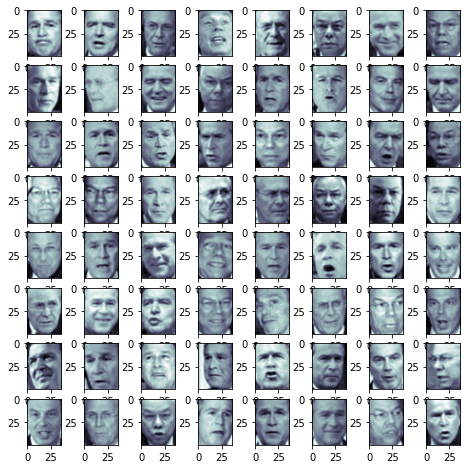

In [15]:
## now we will plot this. 
fig = plt.figure(figsize = (8,8))

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)  # we give three things no of rows, no of columns and position
    ax.imshow(x_approx[i], cmap = plt.cm.bone)
plt.show()

**If we look at this we maintained the image and we didnt loose much data and image looks intact.  
Now we are looking at Eigen Faces**

In [18]:
pca_lfw.components_.shape
eigenv = pca_lfw.components_.reshape(k, 50, 37)

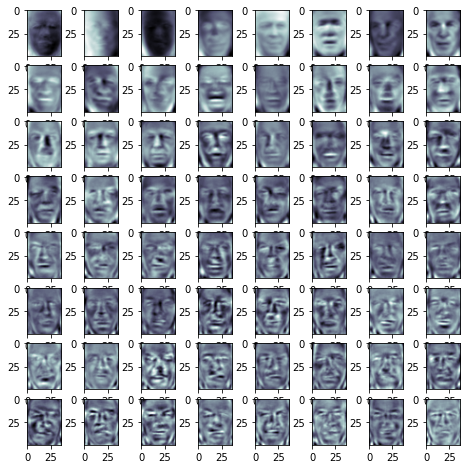

In [20]:
## now we will plot this. 
fig = plt.figure(figsize = (8,8))

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)  # we give three things no of rows, no of columns and position
    ax.imshow(eigenv[i], cmap = plt.cm.bone)
plt.show()

**Now we will use this as classification problem, split this in train and test, use different classification algorithms to figure what is the performance after applying pca and before applying pca.**

In [28]:
pca_oli = PCA()
pca_oli.fit(x_train)

PCA()

In [29]:
k = 0
total = 0
while total < 0.99:
    total += pca_oli.explained_variance_ratio_[k]
    k += 1
    
k

316

In [30]:
pca_lfw1 = PCA(n_components = k, whiten = True)
x_transformed = pca_lfw1.fit_transform(x_train)
x_transformed.shape

(855, 316)

In [35]:
## doing inverse transform
x_approx1 = pca_lfw1.inverse_transform(x_transformed)
## shaping into the image
x_approx1 = x_approx1.reshape((855, 50, 37))

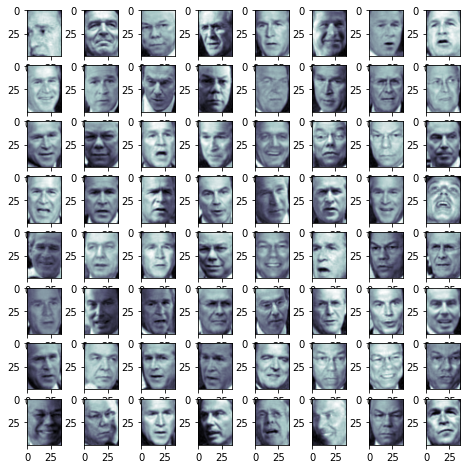

In [36]:
## now we will plot this. 
fig = plt.figure(figsize = (8,8))

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)  # we give three things no of rows, no of columns and position
    ax.imshow(x_approx1[i], cmap = plt.cm.bone)
plt.show()

**Till now, we have used PCA for just Training Data and not for testing data**

In [37]:
x_trained_pca = x_transformed 
x_test_pca = pca_lfw1.transform(x_test)

In [46]:
## using random forest
rf = ensemble.RandomForestClassifier()

#time = time.time()

# first, lets do it without pca
rf.fit(x_train, y_train)
#print(time.time() - start)
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))

## seems like we are getting averageish. Not really great.  
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76        61
           1       0.90      0.25      0.39        36
           2       0.60      0.99      0.74       122
           3       1.00      0.10      0.18        31
           4       0.79      0.31      0.45        35

    accuracy                           0.66       285
   macro avg       0.82      0.47      0.50       285
weighted avg       0.75      0.66      0.60       285

[[ 44   0  17   0   0]
 [  7   9  20   0   0]
 [  1   0 121   0   0]
 [  2   1  22   3   3]
 [  1   0  23   0  11]]


In [48]:
## now doing it with pca
## using random forest
rf = ensemble.RandomForestClassifier()

#time = time.time()

# first, lets do it without pca
rf.fit(x_trained_pca, y_train)
#print(time.time() - start)
y_pred = rf.predict(x_test_pca)
print(classification_report(y_test, y_pred))

## seems like we are getting averageish. Not really great.  
print(confusion_matrix(y_test, y_pred))

## prettty bad score as well

              precision    recall  f1-score   support

           0       0.78      0.30      0.43        61
           1       0.00      0.00      0.00        36
           2       0.46      0.98      0.62       122
           3       0.00      0.00      0.00        31
           4       0.50      0.03      0.05        35

    accuracy                           0.48       285
   macro avg       0.35      0.26      0.22       285
weighted avg       0.42      0.48      0.37       285

[[ 18   0  43   0   0]
 [  1   0  34   0   1]
 [  3   0 119   0   0]
 [  1   0  30   0   0]
 [  0   0  34   0   1]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
